# Saha code

Based on paper by [Seungtaek](https://iopscience.iop.org/article/10.1088/1361-6587/ac7ee8/pdf)

#### Ionization Potential Depression (from continuum lowering)
We assume some average ionization level $\bar{Z} \equiv n_e/n_0$ and also that the ionization is lower than 1 for simplicity.

In atomic units, we have 
$$
\Delta \chi = (\bar{Z} + 1)\sqrt{4 \pi \frac{\bar{Z} (\bar{Z}+1)n_0}{T_e}}
$$
Then the Saha equation is in the singly ionized limit is
$$
\frac{\bar{Z}^2 }{1-\bar{Z}} = \frac{2 g_1}{n_0 g_0} \left(\frac{m_e T_e}{2 \pi}\right)^{3/2} \exp \left[\beta (\chi_0 - \Delta \chi )\right].
$$
Where $g_0$ and $g_1$ are the degeneracy parameters for neutral and singly ionized species. 

#### Argon
For argon this is $g_0=1$, and $g_1\approx 6$, which comes from the fact that S=1/2, L=1, so J={1/2, 3/2}, giving 2 + 4 = 6 total states that are approximately degenerate.

#### Xenon
I think it should be the same, as long as d-orbitals don't play a role...


For ionization energies, see [NIST](https://physics.nist.gov/cgi-bin/ASD/ie.pl?spectra=Xe&units=1&at_num_out=on&el_name_out=on&seq_out=on&shells_out=on&level_out=on&e_out=0&unc_out=on&biblio=on)



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler


mpl.rcParams['lines.linewidth'] = 2.2
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['font.sans-serif'] = ['Arial', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = '#636363'
mpl.rcParams['grid.alpha'] = 0.12
mpl.rcParams['grid.linewidth'] = 0.7
mpl.rcParams['grid.linestyle'] = '-'
mpl.rcParams['axes.prop_cycle'] = cycler('color',  ['#0AB34F', '#bf009f', '#00abc3', '#8e92c5', '#cc7014', '#e32851'])
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['figure.figsize'] = 8, 4.9443
mpl.rcParams['figure.dpi'] = 100

from hnc.hnc.constants import *

In [4]:
from scipy.optimize import root, least_squares

@np.vectorize
def Δχ_func(Zbar, n0, Te): # in AU 
    return np.min( [ (Zbar+1) * np.sqrt(4*π * Zbar*(Zbar+1)*n0/Te) , χ0_AU] )

def leftminusright_saha(Zbar, n0, Te):
    Δχ = Δχ_func(Zbar, n0, Te)
    left_hand_side = Zbar**2/(1 - Zbar) 
    right_hand_side = 2/n0 * g1/g0 * (m_e*Te/(2*π))**(3/2) * np.exp( -(χ0_AU - Δχ)/Te )
    return left_hand_side - right_hand_side

def leftminusrightsquare_saha(Zbar, n0, Te):
    Δχ = Δχ_func(Zbar, n0, Te)
    left_hand_side = Zbar**2/(1 - Zbar) 
    right_hand_side = 2/n0 * g1/g0 * (m_e*Te/(2*π))**(3/2) * np.exp( -(χ0_AU - Δχ)/Te )
    return (left_hand_side - right_hand_side)**2


@np.vectorize
def solve_Saha(Te, n0, Zbar_0=0.5):
    saha_LR = lambda Zbar: leftminusrightsquare_saha(Zbar, n0, Te) 
    ε = 1e-2
    sol =  least_squares(saha_LR, Zbar_0, bounds=(0,1), ftol=1e-10, xtol=1e-8, gtol=None, max_nfev = 1000)
    if sol.cost > 1e-8 or sol.success==False or sol.x<1e-10 or Δχ_func(sol.x, n0, Te)==χ0_AU: #sol.grad > 1e-8 or sol.fun > 1e-8: 
        print(f"{sol.success}: Te={Te:0.3f}, n0={n0:0.1e}, Zbar_0={Zbar_0:0.3f}")
        print(sol)
        return np.nan, np.nan, sol
    return sol.x, Δχ_func(sol.x, n0, Te)#, sol


### Xenon at single density

In [5]:
1/eV_to_AU

27.211383859999998

In [6]:
element='Xe'
g1 = 6 
g0 = 1
χ0_eV = 12.1298437  # eV See 
χ0_AU = χ0_eV*eV_to_AU

n0_invcc = 1.6*1.25e20 
n0_AU = n0_invcc*invcc_to_AU

# array
T_K_array = np.geomspace(5e3, 5e4, num=100)
Zbar_0_list = np.linspace(5e-6,1-1e-6, num=10)
Saha_list = [ solve_Saha(T_K_array*K_to_AU, n0_AU, Zbar_0=Zbar_0) for Zbar_0 in Zbar_0_list] 


True: Te=0.020, n0=3.0e-05, Zbar_0=0.000
     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [ 7.200e-17]
           x: [ 2.333e-28]
        cost: 2.591826364806668e-33
         jac: [[ 8.354e-12]]
        grad: [ 6.014e-28]
  optimality: 1.403215910998721e-55
 active_mask: [-1]
        nfev: 5
        njev: 5
True: Te=0.049, n0=3.0e-05, Zbar_0=0.111
     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [ 1.204e-03]
           x: [ 4.941e-324]
        cost: 7.250789064407858e-07
         jac: [[ 3.459e+01]]
        grad: [ 4.165e-02]
  optimality: 0.0
 active_mask: [-1]
        nfev: 8
        njev: 8
True: Te=0.053, n0=3.0e-05, Zbar_0=0.222
     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [ 4.999e-03]
           x: [ 2.424e-28]
        cost: 1.2493994873682643e-05
         jac: [[ 1.293e+02]]
        grad: [ 6.464e-01]
  opt

In [7]:
# Fix nan, None issues...

Zbar_list = np.array([Saha[0] for Saha in Saha_list])
χ0_list   = np.array([Saha[1] for Saha in Saha_list])
Zbar_mean, Zbar_std = np.nanmean(Zbar_list,axis=0), np.nanstd(Zbar_list,axis=0) 
χ0_mean, χ0_std = np.nanmean(χ0_list,axis=0), np.nanstd(χ0_list,axis=0) 


In [8]:
χ0_mean

array([0.00036224, 0.00042499, 0.00049679, 0.00057868, 0.00067174,
       0.00077719, 0.00089623, 0.00103025, 0.00118064, 0.00134894,
       0.00153671, 0.00174565, 0.00197752, 0.00223418, 0.00251756,
       0.0028297 , 0.00317274, 0.0035489 , 0.0039605 , 0.00441   ,
       0.00489995, 0.00543305, 0.00601216, 0.0066403 , 0.0073207 ,
       0.00805685, 0.00885251, 0.00971184, 0.0106394 , 0.01164031,
       0.01272035, 0.01388614, 0.01514529, 0.01650668, 0.01798076,
       0.0195799 , 0.02131892, 0.02321563, 0.02529169, 0.02757353,
       0.0300938 , 0.0328931 , 0.0360225 , 0.03954706, 0.04355088,
       0.04814469, 0.05347747, 0.05975486, 0.06726908, 0.07644724,
       0.08791982, 0.10254182, 0.12086598, 0.14078224, 0.15718062,
       0.16835638, 0.17570401, 0.18059322, 0.18386922, 0.18603553,
       0.18740417, 0.18817836, 0.18849651, 0.18845667, 0.1881306 ,
       0.18757232, 0.18682343, 0.18591665, 0.18487818, 0.18372929,
       0.18248748, 0.18116733, 0.1797811 , 0.17833917, 0.17685

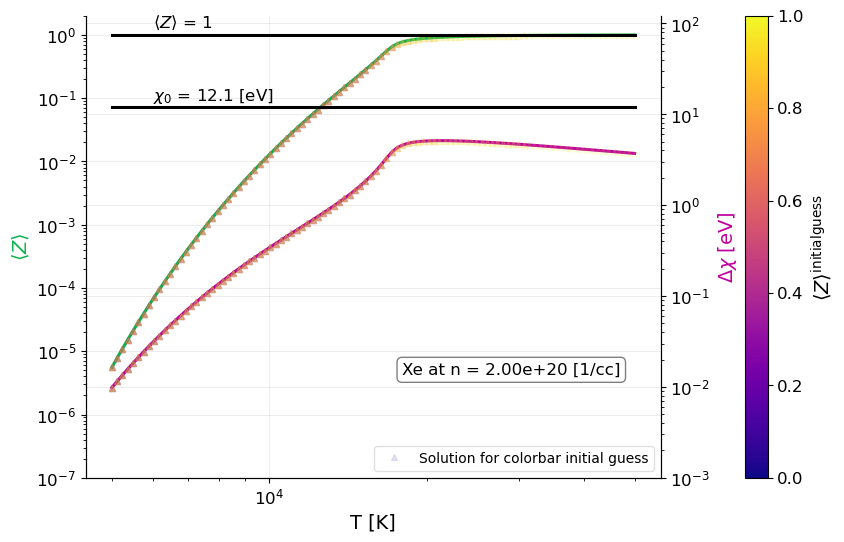

In [9]:
fig, ax = plt.subplots(figsize=(10,6))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.set_ylabel(r"$\langle Z \rangle$",color=colors[0])
ax.set_xlabel("T [K]")
ax.set_xscale('log')

ax2 = ax.twinx()
ax2.set_ylabel(r"$\Delta \chi$ [eV]",color=colors[1])

# Plot mean and Std
ax.plot(T_K_array, Zbar_mean,'-' , color=colors[0])#, label=f'Initial guess')
ax.fill_between(T_K_array, Zbar_mean - Zbar_std, Zbar_mean + Zbar_std, color=colors[0], alpha=0.2)
ax2.plot(T_K_array, χ0_mean*AU_to_eV,'-' , color=colors[1])#, label=r'$\chi_0$')
ax2.fill_between(T_K_array, (χ0_mean - χ0_std)*AU_to_eV, (χ0_mean + χ0_std)*AU_to_eV, color=colors[1], alpha=0.2, linestyle='-')
           

# Plot all actual solution output    
colors = plt.cm.plasma(np.linspace(0, 1,len(Saha_list))) #plt.cycler("color", plt.cm.jet(np.linspace(0,1,len(Saha_list))))

for i, (Zbar_0, Saha) in enumerate(zip(Zbar_0_list, Saha_list)):
    if i==0:
        try:
            ax.plot(T_K_array, Saha[0],'^' , color=colors[i], label=f'Solution for colorbar initial guess', alpha=0.1, markersize=5)
            ax2.plot(T_K_array, Saha[1]*AU_to_eV,'^' , color=colors[i], label=r'$\chi_0$', alpha=0.1, markersize=5)
        except TypeError:
            pass
            
    else:
        try:
            ax.plot(T_K_array, Saha[0],'^' , color=colors[i],alpha=0.1, markersize=5)
            ax2.plot(T_K_array, Saha[1]*AU_to_eV,'^' , color=colors[i],alpha=0.1, markersize=5)
        except TypeError:
            pass


# Plot χ0 Line
ax2.plot(T_K_array, np.ones_like(T_K_array)*χ0_AU*AU_to_eV,'-' ,color='k')
ax2.text(np.min(T_K_array)*1.2, 1.01*χ0_AU*AU_to_eV, r"$\chi_0$ = {0:0.1f} [eV]".format(χ0_AU*AU_to_eV), fontsize=12,
        verticalalignment='bottom')#, bbox=props)

# Plot Zbar=1 Line
ax.plot(T_K_array, np.ones_like(T_K_array),'-' ,color='k')
ax.text(np.min(T_K_array)*1.2, 1.1, r"$\langle Z \rangle$ = 1", fontsize=12,
        verticalalignment='bottom')#, bbox=props)

# Adding a manual colorbar
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
fig.colorbar(sm, ax=[ax, ax2], orientation='vertical', label=r'$\langle Z\rangle^{\rm initial guess}$')

plt.subplots_adjust(right=0.7)

# text
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
inset_text = f"{element} at n = {n0_invcc:0.2e} [1/cc]"
ax.text(0.55, 0.25, inset_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

ax.set_ylim(1e-7,2)
ax2.set_ylim(1e-3,10*χ0_AU*AU_to_eV)

ax.set_yscale('log')
ax2.set_yscale('log')
ax.legend(loc='lower right')
# plt.tight_layout()
# ax.set_yscale('log')

In [10]:
my_TF_data = [[3000.0, # K and Zstar for Xe at 2e20
  3305.6279369727577,
  3642.3920192315923,
  4013.46427205952,
  4422.339873920664,
  4872.8700780069075,
  5369.298487699417,
  5916.30102762826,
  6519.0299868228685,
  7183.1625488016125,
  7914.95426571168,
  8721.297980199406,
  9609.788750003754,
  10588.795386806314,
  11667.539283171733,
  12856.181270059857,
  14165.917323031917,
  15609.084018620242,
  17199.274734168685,
  18951.467685645894,
  20882.167009435834,
  23009.558216973976,
  25353.67948647674,
  27936.61040518359,
  30782.679939899557,
  33918.695594740944,
  37374.19591455014,
  41181.72871234342,
  45377.157641451835,
  50000.0],
 [-0.006116917312127157,
  -0.005400907750590989,
  -0.0053533075096865446,
  -0.0052785587467525374,
  -0.004674889288480699,
  -0.004548089221600549,
  -0.004364758379686862,
  -0.0035639633111941293,
  -0.0024598621314524394,
  -0.000624460459995646,
  0.0032798357608143647,
  0.010289765116688443,
  0.021726028646853024,
  0.03960097907959437,
  0.06529590540239383,
  0.09917318405249631,
  0.14206991368266841,
  0.19443676860029768,
  0.25564122283561375,
  0.32572524746485954,
  0.4050556887516521,
  0.49317649076462544,
  0.5904877785078497,
  0.6977629752107717,
  0.8147466470824298,
  0.9410622666510378,
  1.0785242905201144,
  1.2266292828129863,
  1.3857652761066035,
  1.557591800769309]]

In [11]:
from physics import Physical_Parameters as params

fig, ax = plt.subplots(figsize=(10,6))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


ax.plot(T_K_array, Zbar_mean,'-' , label='Saha')#, label=f'Initial guess')
tmp_Tk = np.geomspace(3e2, 1e5)
ax.plot(tmp_Tk, params.Thomas_Fermi_Zbar(54, n0_invcc*1e6, tmp_Tk ) ,label='TF More')
ax.plot(tmp_Tk, params.Thomas_Fermi_Zbar(54, n0_invcc*1e6, tmp_Tk )/2 ,label=r'1/2 $\times$ TF More')
ax.plot(my_TF_data[0],my_TF_data[1],'--.', label="My TF AA")

ax.set_ylabel(r"$\langle Z \rangle$")
ax.set_xlabel("T [K]")
ax.set_xscale('log')

# text
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
inset_text = f"{element} at n = {n0_invcc:0.2e} [1/cc]"
ax.text(0.25, 0.95, inset_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

ax.set_xlim(1e3,4e4)
# ax.set_yscale('log')
ax.set_ylim(1e-4,3)
ax.legend()


ModuleNotFoundError: No module named 'physics'

### Xenon Mesh for Interpolation

In [ ]:
element='Xe'
g1 = 6 
g0 = 1
χ0_eV = 12.1298437  # eV See 
χ0_AU = χ0_eV*eV_to_AU

# Ion density
n0_invcc_array = 1.25e20*np.geomspace(0.5,1.5,num=20) 

# Temperature
T_K_array = np.geomspace(5e3, 3e4, num=100)

n_invcc_mesh, T_K_mesh = np.meshgrid(n0_invcc_array, T_K_array, indexing='ij')

Zbar_0_list = np.linspace(5e-6,1-1e-6, num=10)
Saha_array = np.array([ solve_Saha(T_K_mesh*K_to_AU, n_invcc_mesh*invcc_to_AU, Zbar_0=Zbar_0) for Zbar_0 in Zbar_0_list] )


In [ ]:
# Fix nan, None issues...

Zbar_list = Saha_array[:,0]#np.array([Saha[0] for Saha in Saha_list])
χ0_list   = Saha_array[:,1]#np.array([Saha[1] for Saha in Saha_list])
Zbar_mean, Zbar_std = np.nanmean(Zbar_list,axis=0), np.nanstd(Zbar_list,axis=0) 
χ0_mean, χ0_std = np.nanmean(χ0_list,axis=0), np.nanstd(χ0_list,axis=0) 


In [ ]:
mesh_save_data = np.array( [ n_invcc_mesh.flatten(), T_K_mesh.flatten(), Zbar_mean.flatten(), Zbar_std.flatten(), χ0_mean.flatten()*AU_to_eV, χ0_std.flatten()*AU_to_eV ]).T
header = ("# Shown is also the standard deviation from a large set of initial guesses, if large then invalid- multiple solutions \n" + 
            "   n[1/cc]      T[K]         Zbar         σ(Zbar)      χ0[eV]       σ(χ0[eV])")
savename = "Xenon_5bar_Saha_solution_data.txt"
np.savetxt(savename, mesh_save_data, header = header , fmt ="%12.3e", comments='')

In [ ]:
from pandas import read_csv
N_n, N_T = 20, 100
saved_data = read_csv(savename, delim_whitespace=True, header=1)
n_invm3_mesh = np.array(saved_data['n[1/cc]']).reshape(N_n, N_T)*1e6
T_K_mesh     = np.array(saved_data['T[K]']).reshape(N_n, N_T)
Zbar_mesh    = np.array(saved_data['Zbar']).reshape(N_n, N_T)
χ0_J_mesh    = np.array(saved_data['χ0[eV]']).reshape(N_n, N_T)*eV_to_K

In [ ]:

from scipy.interpolate import RegularGridInterpolator

zbar_interp = RegularGridInterpolator((n_invm3_mesh[:,0],T_K_mesh[0,:]), Zbar_mesh, bounds_error=False)
zbar_interp((1.875e26, 4e3))

In [ ]:
i,j = -1, -1
n_invm3_mesh[i,j], T_K_mesh[i,j], χ0_J_mesh[i,j]

In [ ]:
i,j = 0, 0
n_invm3_mesh[i,j], T_K_mesh[i,j], χ0_J_mesh[i,j]

In [ ]:
fig, ax = plt.subplots()
 
ax.contourf(n_invm3_mesh,T_K_mesh, χ0_J_mesh )


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r"$n$ [1/m$^3$]")
ax.set_ylabel("T[K]")

# Argon

In [12]:
element='Ar'
g1 = 5.66 #6 
g0 = 1
χ0_eV = 15.8 # eV
χ0_AU = χ0_eV*eV_to_AU

n0_invcc = 6.243944291216209e20
n0_AU = n0_invcc*invcc_to_AU

# array
T_K_array = np.geomspace(1e3, 1e5, num=100)
# T_K_array = np.geomspace(1e4, 4e4, num=100)
Zbar_0_list = np.linspace(1e-6,1-1e-6, num=50)
Saha_list = [ solve_Saha(T_K_array*K_to_AU, n0_AU, Zbar_0=Zbar_0) for Zbar_0 in Zbar_0_list] 


True: Te=0.023, n0=9.3e-05, Zbar_0=0.000
     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [ 2.189e-19]
           x: [ 5.347e-30]
        cost: 2.3965755709167e-38
         jac: [[ 3.418e-14]]
        grad: [ 7.484e-33]
  optimality: 4.001683435867471e-62
 active_mask: [-1]
        nfev: 5
        njev: 5
True: Te=0.057, n0=9.3e-05, Zbar_0=0.020
     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [ 1.369e-05]
           x: [ 3.742e-28]
        cost: 9.366723345639284e-11
         jac: [[ 5.674e-01]]
        grad: [ 7.766e-06]
  optimality: 2.9058757262788233e-33
 active_mask: [-1]
        nfev: 8
        njev: 8
True: Te=0.062, n0=9.3e-05, Zbar_0=0.041
     message: Both `ftol` and `xtol` termination conditions are satisfied.
     success: True
      status: 4
         fun: [ 1.118e-04]
           x: [ 4.941e-324]
        cost: 6.251484655367676e-09
         jac: [[ 4.031e+00]

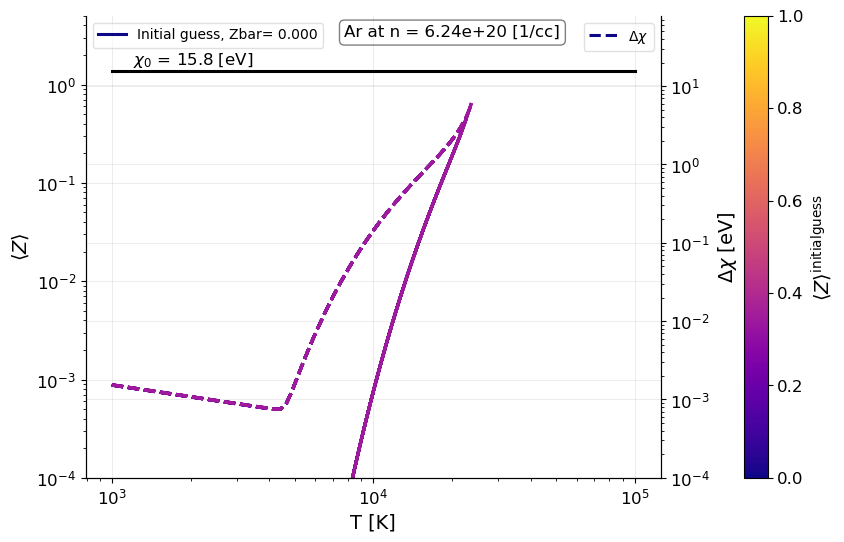

In [24]:
fig, ax = plt.subplots(figsize=(10,6))

# colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

colors = plt.cm.plasma(np.linspace(0, 1,len(Saha_list))) #plt.cycler("color", plt.cm.jet(np.linspace(0,1,len(Saha_list))))



ax.set_ylabel(r"$\langle Z \rangle$")#,color=colors[0])
ax.set_xlabel("T [K]")
ax.set_xscale('log')

ax2 = ax.twinx()
# ax2.plot(T_K_array, Δχ_Saha*AU_to_eV,'--.',color=colors[1])
ax2.set_ylabel(r"$\Delta \chi$ [eV]")#,color=colors[1])

for i, (Zbar_0, Saha) in enumerate(zip(Zbar_0_list, Saha_list)):
    if i==0:
        try:
            ax.plot(T_K_array, Saha[0],'-' , color=colors[i], label=f'Initial guess, Zbar= {Zbar_0:0.3f}')
            ax2.plot(T_K_array, Saha[1]*AU_to_eV,'--' , color=colors[i], label=r'$\Delta \chi$')
        except TypeError:
            pass
            
    else:
        try:
            ax.plot(T_K_array, Saha[0],'-' , color=colors[i])#, label=f'Initial guess, Zbar= {Zbar_0:0.3f}')
            ax2.plot(T_K_array, Saha[1]*AU_to_eV,'--' , color=colors[i])
        except TypeError:
            pass
            
# ax2.plot(T_K_array, Δχ_Saha_1*AU_to_eV,'-' ,color=colors[1])

ax2.plot(T_K_array, np.ones_like(T_K_array)*χ0_AU*AU_to_eV,'-' ,color='k')
ax2.text(np.min(T_K_array)*1.2, 1.01*χ0_AU*AU_to_eV, r"$\chi_0$ = {0:0.1f} [eV]".format(χ0_AU*AU_to_eV), fontsize=12,
        verticalalignment='bottom')#, bbox=props)

# Adding a manual colorbar
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
fig.colorbar(sm, ax=[ax, ax2], orientation='vertical', label=r'$\langle Z\rangle^{\rm initial guess}$')

plt.subplots_adjust(right=0.7)

# text
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
inset_text = f"{element} at n = {n0_invcc:0.2e} [1/cc]"
ax.text(0.45, 0.98, inset_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

ax.set_ylim(1e-4,5)
ax2.set_ylim(1e-4,5*χ0_AU*AU_to_eV)

ax.set_yscale('log')
ax2.set_yscale('log')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# plt.tight_layout()

# ax.set_yscale('log')

In [25]:
# Fix nan, None issues...

Zbar_list = np.array([Saha[0] for Saha in Saha_list])
χ0_list   = np.array([Saha[1] for Saha in Saha_list])
Zbar_mean, Zbar_std = np.nanmean(Zbar_list,axis=0), np.nanstd(Zbar_list,axis=0) 
χ0_mean, χ0_std = np.nanmean(χ0_list,axis=0), np.nanstd(χ0_list,axis=0) 


/tmp/ipykernel_2389666/3277088514.py:5: RuntimeWarning: Mean of empty slice
  Zbar_mean, Zbar_std = np.nanmean(Zbar_list,axis=0), np.nanstd(Zbar_list,axis=0)
/tmp/ipykernel_2389666/3277088514.py:6: RuntimeWarning: Mean of empty slice
  χ0_mean, χ0_std = np.nanmean(χ0_list,axis=0), np.nanstd(χ0_list,axis=0)


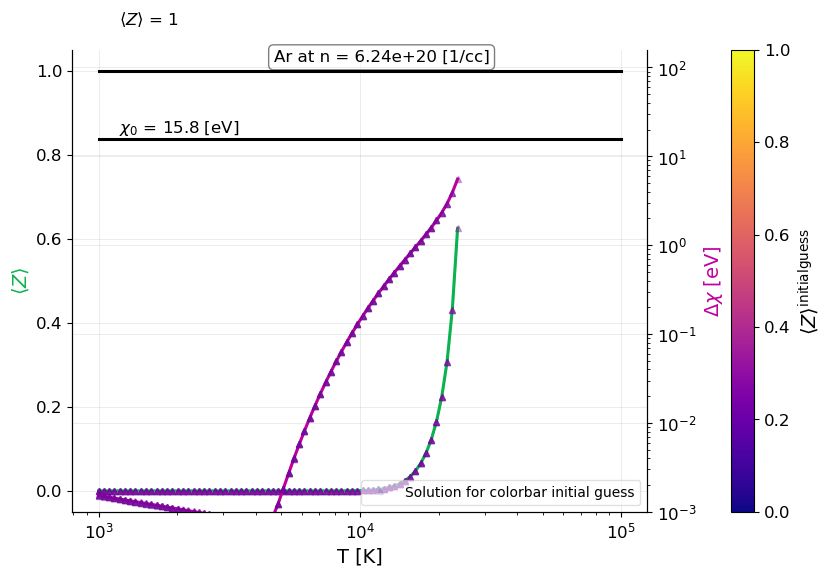

In [26]:
fig, ax = plt.subplots(figsize=(10,6))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.set_ylabel(r"$\langle Z \rangle$",color=colors[0])
ax.set_xlabel("T [K]")
ax.set_xscale('log')

ax2 = ax.twinx()
ax2.set_ylabel(r"$\Delta \chi$ [eV]",color=colors[1])

# Plot mean and Std
ax.plot(T_K_array, Zbar_mean,'-' , color=colors[0])#, label=f'Initial guess')
ax.fill_between(T_K_array, Zbar_mean - Zbar_std, Zbar_mean + Zbar_std, color=colors[0], alpha=0.2)
ax2.plot(T_K_array, χ0_mean*AU_to_eV,'-' , color=colors[1])#, label=r'$\chi_0$')
ax2.fill_between(T_K_array, (χ0_mean - χ0_std)*AU_to_eV, (χ0_mean + χ0_std)*AU_to_eV, color=colors[1], alpha=0.2, linestyle='-')
           

# Plot all actual solution output    
colors = plt.cm.plasma(np.linspace(0, 1,len(Saha_list))) #plt.cycler("color", plt.cm.jet(np.linspace(0,1,len(Saha_list))))

for i, (Zbar_0, Saha) in enumerate(zip(Zbar_0_list, Saha_list)):
    if i==0:
        try:
            ax.plot(T_K_array, Saha[0],'^' , color=colors[i], label=f'Solution for colorbar initial guess', alpha=0.1, markersize=5)
            ax2.plot(T_K_array, Saha[1]*AU_to_eV,'^' , color=colors[i], label=r'$\chi_0$', alpha=0.1, markersize=5)
        except TypeError:
            pass
            
    else:
        try:
            ax.plot(T_K_array, Saha[0],'^' , color=colors[i],alpha=0.1, markersize=5)
            ax2.plot(T_K_array, Saha[1]*AU_to_eV,'^' , color=colors[i],alpha=0.1, markersize=5)
        except TypeError:
            pass


# Plot χ0 Line
ax2.plot(T_K_array, np.ones_like(T_K_array)*χ0_AU*AU_to_eV,'-' ,color='k')
ax2.text(np.min(T_K_array)*1.2, 1.01*χ0_AU*AU_to_eV, r"$\chi_0$ = {0:0.1f} [eV]".format(χ0_AU*AU_to_eV), fontsize=12,
        verticalalignment='bottom')#, bbox=props)

# Plot Zbar=1 Line
ax.plot(T_K_array, np.ones_like(T_K_array),'-' ,color='k')
ax.text(np.min(T_K_array)*1.2, 1.1, r"$\langle Z \rangle$ = 1", fontsize=12,
        verticalalignment='bottom')#, bbox=props)

# Adding a manual colorbar
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
fig.colorbar(sm, ax=[ax, ax2], orientation='vertical', label=r'$\langle Z\rangle^{\rm initial guess}$')

plt.subplots_adjust(right=0.7)

# text
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
inset_text = f"{element} at n = {n0_invcc:0.2e} [1/cc]"
ax.text(0.35, 1, inset_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

# ax.set_ylim(1e-5,2)
ax2.set_ylim(1e-3,10*χ0_AU*AU_to_eV)

# ax.set_yscale('log')
ax2.set_yscale('log')
ax.legend(loc='lower right')
# plt.tight_layout()
# ax.set_yscale('log')

In [35]:
last_index = 69
T_K_array[:last_index], Zbar_mean[:last_index], χ0_mean[:last_index]

(array([ 1000.        ,  1047.61575279,  1097.49876549,  1149.7569954 ,
         1204.50354026,  1261.85688307,  1321.94114847,  1384.88637139,
         1450.8287785 ,  1519.91108295,  1592.28279334,  1668.1005372 ,
         1747.52840001,  1830.7382803 ,  1917.91026167,  2009.23300257,
         2104.90414451,  2205.1307399 ,  2310.12970008,  2420.12826479,
         2535.36449397,  2656.08778295,  2782.55940221,  2915.05306283,
         3053.85550883,  3199.2671378 ,  3351.60265094,  3511.19173422,
         3678.37977183,  3853.52859371,  4037.0172586 ,  4229.24287439,
         4430.62145758,  4641.58883361,  4862.60158007,  5094.13801482,
         5336.69923121,  5590.81018251,  5857.02081806,  6135.90727341,
         6428.07311728,  6734.15065775,  7054.80231072,  7390.72203353,
         7742.63682681,  8111.3083079 ,  8497.53435909,  8902.15085445,
         9326.03346883,  9770.09957299, 10235.31021899, 10722.6722201 ,
        11233.24032978, 11768.11952435, 12328.46739442, 12915.49

In [289]:
solve_Saha(2.14e4*K_to_AU, n0_AU, Zbar_0=0.05)

True: Te=0.068, n0=3.7e-04, Zbar_0=0.050
     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [ 4.135e-05]
           x: [ 4.310e-27]
        cost: 8.549795830179611e-10
         jac: [[ 2.637e+00]]
        grad: [ 1.090e-04]
  optimality: 4.700093597074183e-31
 active_mask: [-1]
        nfev: 10
        njev: 10
True: Te=0.068, n0=3.7e-04, Zbar_0=0.050
     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [ 4.135e-05]
           x: [ 4.310e-27]
        cost: 8.549795830179611e-10
         jac: [[ 2.637e+00]]
        grad: [ 1.090e-04]
  optimality: 4.700093597074183e-31
 active_mask: [-1]
        nfev: 10
        njev: 10


(array(nan),
 array(nan),
 array(     message: `xtol` termination condition is satisfied.
      success: True
       status: 3
          fun: [ 4.135e-05]
            x: [ 4.310e-27]
         cost: 8.549795830179611e-10
          jac: [[ 2.637e+00]]
         grad: [ 1.090e-04]
   optimality: 4.700093597074183e-31
  active_mask: [-1]
         nfev: 10
         njev: 10, dtype=object))

Text(0.25, 0.95, 'Ar at n = 2.53e+21 [1/cc]')

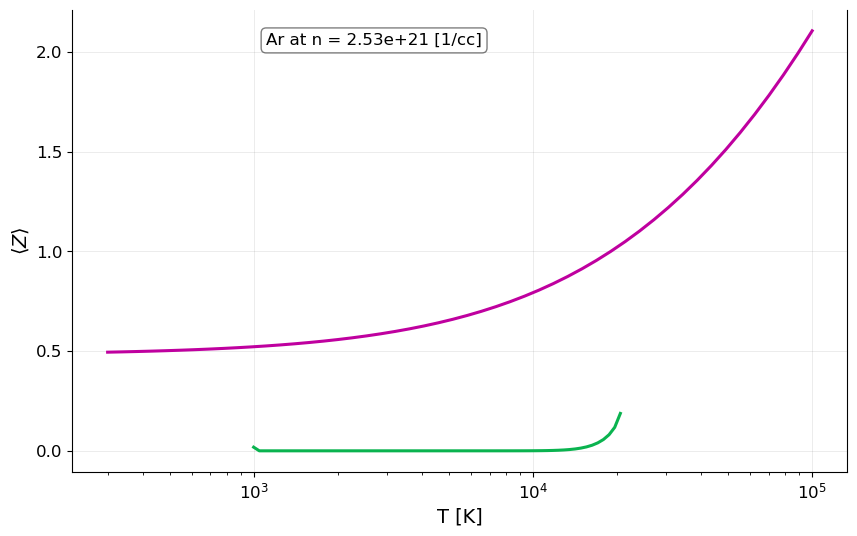

In [296]:
from physics import Physical_Parameters as params

fig, ax = plt.subplots(figsize=(10,6))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


ax.plot(T_K_array, Zbar_mean,'-' , label='Saha')#, label=f'Initial guess')
tmp_Tk = np.geomspace(3e2, 1e5)
ax.plot(tmp_Tk, params.Thomas_Fermi_Zbar(18, n0_invcc*1e6, tmp_Tk ) )

ax.set_ylabel(r"$\langle Z \rangle$")
ax.set_xlabel("T [K]")
ax.set_xscale('log')

# text
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
inset_text = f"{element} at n = {n0_invcc:0.2e} [1/cc]"
ax.text(0.25, 0.95, inset_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
